In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
data = pd.read_excel('nba_data.xlsx')

C:\Users\sanka\AppData\Local\Temp\ipykernel_12460\904811480.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Sample Data

In [3]:
sple = data.sample(10)
sple

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
1338,2013-14,Playoffs,203268,180,Jorge Gutierrez,1610612751,BKN,2,3,0,0,0.000,0,0,0.000,2,4,0.500,1,0,1,0,0,0,0,0,2,1,0.00,0.00
6539,2021-22,Regular%20Season,1626171,69,Bobby Portis,1610612749,MIL,72,2028,417,871,0.479,133,338,0.393,85,113,0.752,180,477,657,86,53,51,90,174,1052,1327,0.96,0.59
7493,2022-23,Regular%20Season,1628470,201,Torrey Craig,1610612756,PHX,79,1948,228,500,0.456,100,253,0.395,32,45,0.711,145,281,426,117,50,62,73,179,588,885,1.60,0.69
2157,2015-16,Regular%20Season,201588,96,George Hill,1610612754,IND,74,2524,326,739,0.441,128,314,0.408,114,150,0.760,58,240,298,259,83,17,101,149,894,1001,2.56,0.82
2258,2015-16,Regular%20Season,201962,196,Toney Douglas,1610612740,NOP,61,1262,183,445,0.411,81,203,0.399,84,99,0.848,25,118,143,157,70,5,64,131,531,565,2.45,1.09
5201,2019-20,Regular%20Season,1626192,255,Pat Connaughton,1610612749,MIL,67,1243,137,301,0.455,55,166,0.331,31,40,0.775,60,224,284,107,25,31,52,70,360,582,2.06,0.48
4260,2018-19,Regular%20Season,203082,57,Terrence Ross,1610612753,ORL,81,2150,440,1027,0.428,217,566,0.383,126,144,0.875,27,253,280,135,72,29,90,119,1223,1044,1.50,0.80
5617,2019-20,Playoffs,1629626,143,Bol Bol,1610612743,DEN,4,21,5,9,0.556,2,3,0.667,7,8,0.875,3,2,5,0,2,2,2,1,19,21,0.00,1.00
96,2012-13,Regular%20Season,201155,96,Rodney Stuckey,1610612765,DET,76,2171,304,748,0.406,55,182,0.302,213,272,0.783,43,169,212,270,51,17,134,127,876,789,2.02,0.38
8022,2022-23,Playoffs,1630233,185,Nathan Knight,1610612750,MIN,2,5,1,4,0.250,0,2,0.000,0,0,0.000,1,0,1,0,0,0,1,0,2,-1,0.00,0.00


In [6]:
data.shape

(8049, 30)

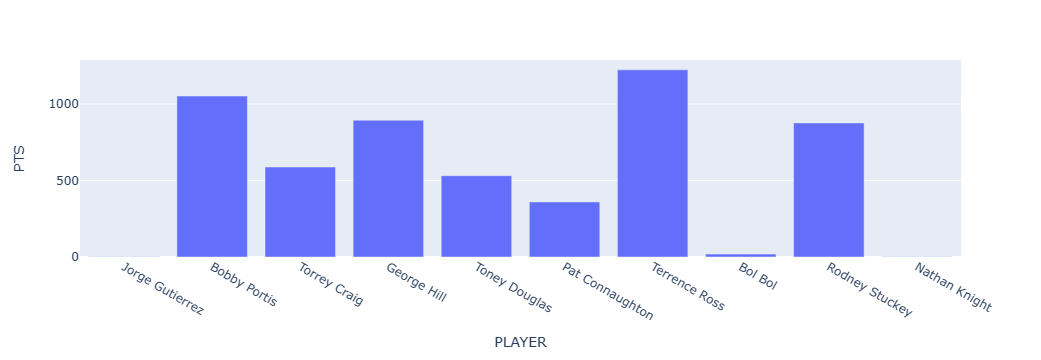

In [7]:
fig = px.bar(sple,'PLAYER','PTS')
fig.show()

In [8]:
data['start_year']=data['Year'].str[:4].astype(int)

## Rebranded Teams

In [9]:
data['TEAM'].unique()

array(['OKC', 'LAL', 'MIA', 'HOU', 'NYK', 'GSW', 'MIL', 'POR', 'TOR',
       'BKN', 'CHA', 'LAC', 'BOS', 'UTA', 'PHI', 'IND', 'SAS', 'ATL',
       'CLE', 'NOH', 'DET', 'CHI', 'SAC', 'DAL', 'DEN', 'MEM', 'PHX',
       'ORL', 'MIN', 'WAS', 'NOP'], dtype=object)

In [10]:
data['TEAM'].nunique()

31

In [11]:
data['TEAM'].replace(to_replace=['NOP','NOH'],value = 'NO',inplace = True)

C:\Users\sanka\AppData\Local\Temp\ipykernel_12460\463032575.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [12]:
data['TEAM'].nunique(),data['TEAM'].unique()

(30,
 array(['OKC', 'LAL', 'MIA', 'HOU', 'NYK', 'GSW', 'MIL', 'POR', 'TOR',
        'BKN', 'CHA', 'LAC', 'BOS', 'UTA', 'PHI', 'IND', 'SAS', 'ATL',
        'CLE', 'NO', 'DET', 'CHI', 'SAC', 'DAL', 'DEN', 'MEM', 'PHX',
        'ORL', 'MIN', 'WAS'], dtype=object))

## Regular season and Playoffs Data

In [13]:
data['Season_type'].replace('Regular%20Season','Regular',inplace=True)

C:\Users\sanka\AppData\Local\Temp\ipykernel_12460\724353871.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [14]:
data['Season_type'].unique()

array(['Regular', 'Playoffs'], dtype=object)

In [15]:
regular_data = data[data['Season_type']=='Regular']
playoffs_data = data[data['Season_type']=='Playoffs']

In [16]:
totals_col = ['MIN','FGM','FGA','FG3M','FG3A','FTM','FTA','OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS']

In [17]:
data.groupby(['PLAYER','PLAYER_ID','Year'])[totals_col].sum().reset_index()

,PLAYER,PLAYER_ID,Year,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Lawson,1630639,2022-23,108,22,44,10,25,2,8,6,15,21,2,2,0,3,11,56
1,AJ Green,1631260,2022-23,345,53,125,44,105,4,4,6,39,45,22,6,0,9,31,154
2,AJ Griffin,1631100,2022-23,1401,248,533,101,259,42,47,37,116,153,73,42,12,42,87,639
3,AJ Hammons,1627773,2016-17,163,17,42,5,10,9,20,8,28,36,4,1,13,10,21,48
4,AJ Price,201985,2012-13,1278,161,413,70,200,49,62,20,94,114,205,33,3,64,73,441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5691,Zion Williamson,1629627,2020-21,2026,634,1037,10,34,369,529,167,274,441,226,57,39,167,135,1647
5692,Zion Williamson,1629627,2022-23,956,285,469,7,19,177,248,58,144,202,133,32,16,99,65,754
5693,Zoran Dragic,204054,2014-15,75,11,30,3,14,3,5,5,3,8,5,2,0,5,6,28
5694,Zylan Cheatham,1629597,2019-20,51,6,9,0,1,0,0,3,6,9,3,1,1,4,10,12


## Per Minute Stats

In [19]:
data_perminhh = data_permin[data_permin.columns[3:]]
data_perminhh.corr()

,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
MIN,1.000000,0.433640,0.351344,0.180185,0.098365,0.347087,0.278119,-0.110065,0.045431,-0.017004,0.242707,0.052840,-0.054692,0.139165,-0.386126,0.460659
FGM,0.433640,1.000000,0.871501,0.185260,0.132240,0.617964,0.575841,0.078202,0.227993,0.183978,0.225556,-0.030691,0.070332,0.398899,-0.195965,0.957245
FGA,0.351344,0.871501,1.000000,0.414607,0.433412,0.556586,0.469328,-0.215146,-0.015370,-0.102040,0.333412,0.020467,-0.171110,0.421841,-0.325570,0.895687
FG3M,0.180185,0.185260,0.414607,1.000000,0.957410,-0.022365,-0.162794,-0.617219,-0.395864,-0.525063,0.159271,-0.002418,-0.441526,-0.073916,-0.401166,0.350839
FG3A,0.098365,0.132240,0.433412,0.957410,1.000000,-0.038454,-0.176990,-0.650788,-0.424095,-0.558045,0.178344,0.022965,-0.467604,-0.052597,-0.397391,0.297761
FTM,0.347087,0.617964,0.556586,-0.022365,-0.038454,1.000000,0.953118,0.094807,0.195037,0.169304,0.249050,0.026928,0.069396,0.456253,-0.087788,0.744266
FTA,0.278119,0.575841,0.469328,-0.162794,-0.176990,0.953118,1.000000,0.243048,0.296010,0.299306,0.174237,0.027910,0.181570,0.459592,0.015584,0.668375
OREB,-0.110065,0.078202,-0.215146,-0.617219,-0.650788,0.094807,0.243048,1.000000,0.676037,0.873589,-0.387879,-0.128835,0.615997,-0.005127,0.494471,-0.051384
DREB,0.045431,0.227993,-0.015370,-0.395864,-0.424095,0.195037,0.296010,0.676037,1.000000,0.949186,-0.239702,-0.134034,0.548365,0.113285,0.328171,0.137182
REB,-0.017004,0.183978,-0.102040,-0.525063,-0.558045,0.169304,0.299306,0.873589,0.949186,1.000000,-0.323974,-0.143548,0.625260,0.072629,0.427929,0.068656


In [18]:
data_permin = data.groupby(['PLAYER','PLAYER_ID','Year'])[totals_col].sum().reset_index()
for col in data_permin.columns[4:]:
    data_permin[col] = data_permin[col]/data_permin['MIN']
data_permin = data_permin[data_permin['MIN']>=50]
data_permin

,PLAYER,PLAYER_ID,Year,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Lawson,1630639,2022-23,108,0.203704,0.407407,0.092593,0.231481,0.018519,0.074074,0.055556,0.138889,0.194444,0.018519,0.018519,0.000000,0.027778,0.101852,0.518519
1,AJ Green,1631260,2022-23,345,0.153623,0.362319,0.127536,0.304348,0.011594,0.011594,0.017391,0.113043,0.130435,0.063768,0.017391,0.000000,0.026087,0.089855,0.446377
2,AJ Griffin,1631100,2022-23,1401,0.177016,0.380443,0.072091,0.184868,0.029979,0.033547,0.026410,0.082798,0.109208,0.052106,0.029979,0.008565,0.029979,0.062099,0.456103
3,AJ Hammons,1627773,2016-17,163,0.104294,0.257669,0.030675,0.061350,0.055215,0.122699,0.049080,0.171779,0.220859,0.024540,0.006135,0.079755,0.061350,0.128834,0.294479
4,AJ Price,201985,2012-13,1278,0.125978,0.323161,0.054773,0.156495,0.038341,0.048513,0.015649,0.073552,0.089202,0.160407,0.025822,0.002347,0.050078,0.057121,0.345070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,Zion Williamson,1629627,2019-20,668,0.314371,0.538922,0.008982,0.020958,0.170659,0.266467,0.095808,0.128743,0.224551,0.074850,0.023952,0.013473,0.088323,0.062874,0.808383
5691,Zion Williamson,1629627,2020-21,2026,0.312932,0.511846,0.004936,0.016782,0.182132,0.261106,0.082428,0.135242,0.217670,0.111550,0.028134,0.019250,0.082428,0.066634,0.812932
5692,Zion Williamson,1629627,2022-23,956,0.298117,0.490586,0.007322,0.019874,0.185146,0.259414,0.060669,0.150628,0.211297,0.139121,0.033473,0.016736,0.103556,0.067992,0.788703
5693,Zoran Dragic,204054,2014-15,75,0.146667,0.400000,0.040000,0.186667,0.040000,0.066667,0.066667,0.040000,0.106667,0.066667,0.026667,0.000000,0.066667,0.080000,0.373333


## Correlation 

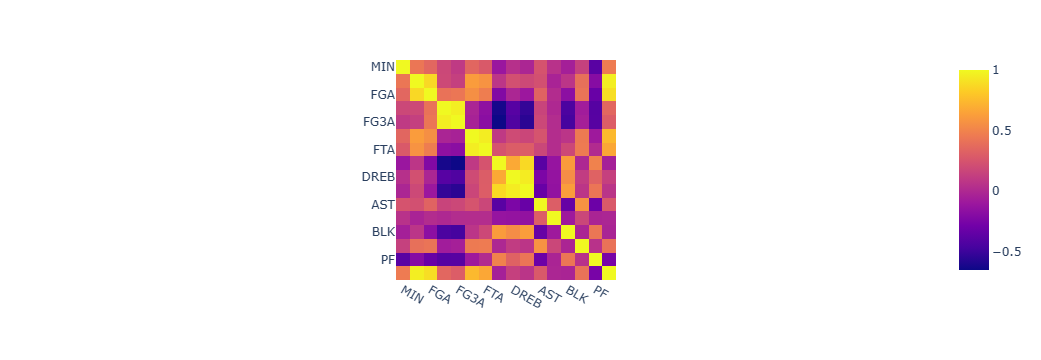

In [20]:
fig = px.imshow(data_perminhh.corr())

fig.show()

## Lebron James Scoring Distribution

In [21]:
lebron = data.loc[data['PLAYER_ID']==2544]
lebron_regular = lebron.loc[lebron['Season_type']=='Regular']
lebron_regular

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,start_year
2,2012-13,Regular,2544,3,LeBron James,1610612748,MIA,76,2877,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036,2446,2.44,0.57,2012
679,2013-14,Regular,2544,3,LeBron James,1610612748,MIA,77,2902,767,1353,0.567,116,306,0.379,439,585,0.750,81,452,533,488,121,26,270,126,2089,2255,1.81,0.45,2013
1365,2014-15,Regular,2544,4,LeBron James,1610612739,CLE,69,2493,624,1279,0.488,120,339,0.354,375,528,0.710,51,365,416,511,109,49,272,135,1743,1748,1.88,0.40,2014
2065,2015-16,Regular,2544,4,LeBron James,1610612739,CLE,76,2709,737,1416,0.520,87,282,0.309,359,491,0.731,111,454,565,514,104,49,249,143,1920,2092,2.06,0.42,2015
2761,2016-17,Regular,2544,9,LeBron James,1610612739,CLE,74,2795,736,1344,0.548,124,342,0.363,358,531,0.674,97,542,639,646,92,44,303,134,1954,2291,2.13,0.30,2016
3454,2017-18,Regular,2544,1,LeBron James,1610612739,CLE,82,3026,857,1580,0.542,149,406,0.367,388,531,0.731,97,612,709,747,116,71,347,136,2251,2681,2.15,0.33,2017
4231,2018-19,Regular,2544,28,LeBron James,1610612747,LAL,55,1937,558,1095,0.510,111,327,0.339,278,418,0.665,57,408,465,454,72,33,197,94,1505,1655,2.31,0.36,2018
4953,2019-20,Regular,2544,8,LeBron James,1610612747,LAL,67,2316,643,1303,0.493,148,425,0.348,264,381,0.693,66,459,525,684,78,36,261,118,1698,1983,2.62,0.30,2019
5737,2020-21,Regular,2544,46,LeBron James,1610612747,LAL,45,1504,422,823,0.513,104,285,0.365,178,255,0.698,29,317,346,350,48,25,168,70,1126,1249,2.08,0.29,2020
6481,2021-22,Regular,2544,11,LeBron James,1610612747,LAL,56,2084,640,1221,0.524,161,448,0.359,254,336,0.756,63,396,459,349,73,59,196,121,1695,1776,1.78,0.37,2021


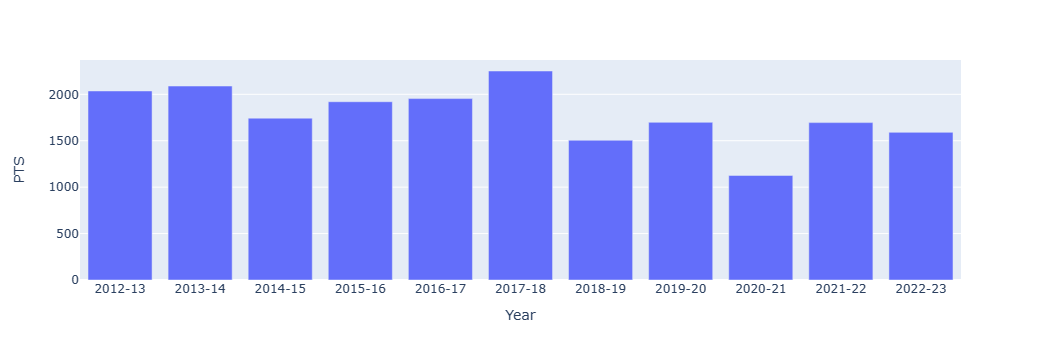

In [22]:
fig = px.bar(lebron_regular,'Year','PTS')
fig.show()

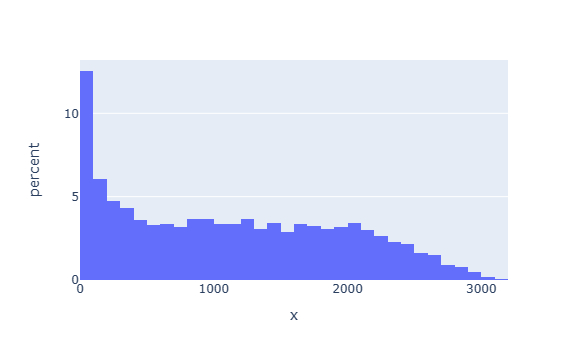

In [25]:
fig = px.histogram(x=regular_data['MIN'],histnorm = 'percent')
fig.show()

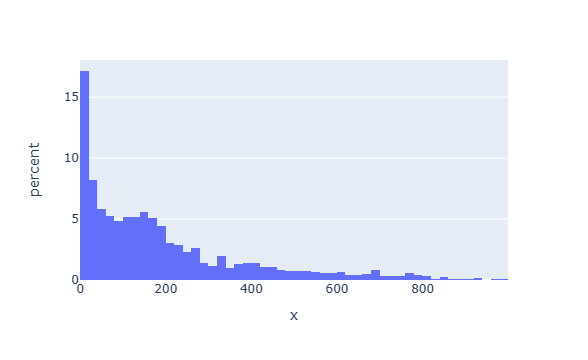

In [26]:
fig = px.histogram(x=playoffs_data['MIN'],histnorm = 'percent')
fig.show()

## Minutes Distribution

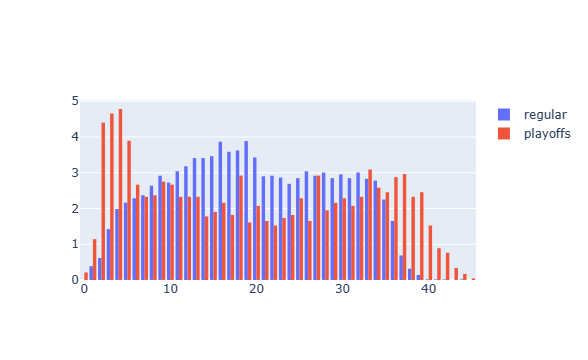

In [28]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = regular_data['MIN']/regular_data['GP'],histnorm = 'percent',name = 'regular'))
fig.add_trace(go.Histogram(x = playoffs_data['MIN']/playoffs_data['GP'],histnorm = 'percent',name = 'playoffs'))
fig.show()

## Points Distribution

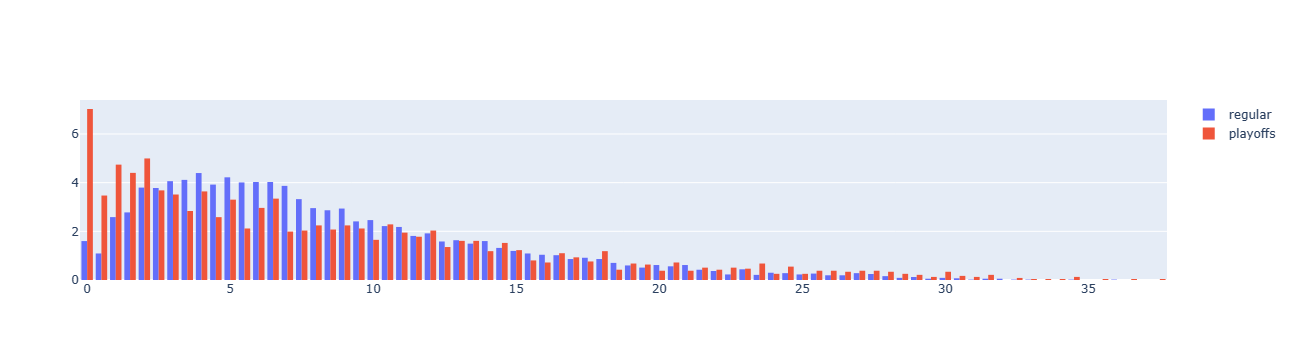

In [110]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = regular_data['PTS']/regular_data['GP'],histnorm = 'percent',name = 'regular'))
fig.add_trace(go.Histogram(x = playoffs_data['PTS']/playoffs_data['GP'],histnorm = 'percent',name = 'playoffs'))
fig.show()

## Yearly Data

In [43]:
years_data = data.groupby(['start_year'])[totals_col].sum().reset_index()
years_data['POSS'] = years_data['FGA']-years_data['OREB']+years_data['TOV']+0.5*years_data['FTA']
years_data = years_data[list(years_data.columns[0:2])+['POSS']+list(years_data.columns[2:-1])]
years_data['FG%'] = years_data['FGM']/years_data['FGA']
years_data['3PT%'] = years_data['FG3M']/years_data['FG3A']
years_data['FT%'] = years_data['FTM']/years_data['FTA']
years_data['AST%'] = years_data['AST']/years_data['FGM']
years_data['FG3A%'] =years_data['FG3A']/years_data['FGA']
years_data['PTS/FGA'] = years_data['PTS']/years_data['FGA']
years_data['FG3M/FGM'] = years_data['FG3M']/years_data['FGM']
years_data['FTA/FGA'] = years_data['FTA']/years_data['FGA']
years_data['TRU%'] = 0.5*years_data['PTS']/(years_data['FGA']+0.475*years_data['FTA'])
years_data['AST_TOV'] = years_data['AST']/years_data['TOV']
years_data

,start_year,MIN,POSS,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,635884,251719.0,97235,215105,18808,52569,44125,58618,29237,81362,110599,57694,20376,13444,36542,52548,257403,0.452035,0.357777,0.752755,0.593346,0.244388,1.196639,0.193428,0.272509,0.529748,1.578841
1,2013,638373,257778.0,99251,218411,20480,56952,47219,62420,28669,83812,112481,57657,20156,12369,36826,54839,266201,0.454423,0.359601,0.756472,0.580921,0.260756,1.218808,0.206346,0.285791,0.536565,1.565660
2,2014,634546,256619.0,98251,219265,20724,59276,45098,60248,28566,85231,113797,57727,20261,12665,35796,53272,262324,0.448092,0.349619,0.748539,0.587546,0.270340,1.196379,0.210929,0.274773,0.529129,1.612666
3,2015,636391,261756.0,100351,222344,22524,63673,46516,61520,27426,87611,115037,58251,20562,13046,36078,53478,269742,0.451332,0.353745,0.756112,0.580473,0.286372,1.213174,0.224452,0.276688,0.536126,1.614585
4,2016,632482,262081.0,102147,223333,25408,71018,46806,60620,26470,87173,113643,59162,20143,12409,34908,52232,276508,0.457375,0.357768,0.772121,0.579185,0.317992,1.238097,0.248740,0.271433,0.548350,1.694798
5,2017,633425,264325.0,103729,225523,27530,76245,43721,57008,25397,88678,114075,60739,20181,12636,35695,52238,278709,0.459949,0.361073,0.766927,0.585555,0.338081,1.235834,0.265403,0.252781,0.551677,1.701611
6,2018,634231,272388.5,107374,233717,29817,84143,46671,60811,27128,91360,118488,64257,19940,12984,35394,55063,291236,0.459419,0.354361,0.767476,0.598441,0.360021,1.246105,0.277693,0.260191,0.554519,1.815477
7,2019,552262,237559.0,92997,202223,28032,78279,40949,52906,22802,79318,102120,55445,17368,11085,31685,47615,254975,0.459874,0.358104,0.773995,0.596202,0.387092,1.260861,0.301429,0.261622,0.560746,1.749882
8,2020,562518,238814.5,95849,205754,29549,80653,39624,50917,22918,80151,103069,57311,17491,11272,30520,45152,260871,0.465843,0.366372,0.778208,0.597930,0.391988,1.267878,0.308287,0.247465,0.567260,1.877818
9,2021,635572,267467.5,106569,231293,32733,92552,44740,57709,27052,89602,116654,64618,20006,12387,34372,52038,290611,0.460753,0.353671,0.775269,0.606349,0.400150,1.256463,0.307153,0.249506,0.561665,1.879960


## Yearly Data Per 48 Mins Per Team

In [53]:
years_data_per48min = years_data.copy()
for col in years_data_per48min.columns[2:18]:
    years_data_per48min[col] = (years_data_per48min[col]/years_data_per48min['MIN'])*48*5
years_data_per48min.drop(columns='MIN',inplace=True)
years_data_per48min

,start_year,POSS,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,95.005630,36.699146,81.186506,7.098653,19.840977,16.653981,22.124035,11.034843,30.708242,41.743085,21.775292,7.690459,5.074133,13.791949,19.833051,97.150927,0.452035,0.357777,0.752755,0.593346,0.244388,1.196639,0.193428,0.272509,0.529748,1.578841
1,2013,96.913121,37.313984,82.112871,7.699574,21.411432,17.752255,23.467158,10.778275,31.509603,42.287879,21.676481,7.577764,4.650197,13.844946,20.617037,100.079797,0.454423,0.359601,0.756472,0.580921,0.260756,1.218808,0.206346,0.285791,0.536565,1.565660
2,2014,97.059252,37.160805,82.931103,7.838297,22.419557,17.057109,22.787190,10.804323,32.236339,43.040662,21.833689,7.663180,4.790196,13.538877,20.148705,99.217015,0.448092,0.349619,0.748539,0.587546,0.270340,1.196379,0.210929,0.274773,0.529129,1.612666
3,2015,98.715161,37.845036,83.851846,8.494400,24.012785,17.542423,23.200831,10.343075,33.040442,43.383517,21.968004,7.754478,4.919994,13.605975,20.167978,101.726894,0.451332,0.353745,0.756112,0.580473,0.286372,1.213174,0.224452,0.276688,0.536126,1.614585
4,2016,99.448585,38.760439,84.745368,9.641255,26.948308,17.760885,23.002710,10.044238,33.078443,43.122682,22.449461,7.643411,4.708687,13.246100,19.819821,104.923018,0.457375,0.357768,0.772121,0.579185,0.317992,1.238097,0.248740,0.271433,0.548350,1.694798
5,2017,100.150768,39.302143,85.448980,10.430911,28.888661,16.565560,21.599905,9.622734,33.599432,43.222165,23.013553,7.646430,4.787686,13.524569,19.792588,105.600758,0.459949,0.361073,0.766927,0.585555,0.338081,1.235834,0.265403,0.252781,0.551677,1.701611
6,2018,103.074810,40.631505,88.441088,11.283081,31.840639,17.660821,23.011553,10.265534,34.571631,44.837165,24.315557,7.545516,4.913289,13.393480,20.836446,110.206912,0.459419,0.354361,0.767476,0.598441,0.360021,1.246105,0.277693,0.260191,0.554519,1.815477
7,2019,103.237521,40.414296,87.881332,12.182044,34.018202,17.795467,22.991696,9.909210,34.469726,44.378936,24.095085,7.547722,4.817279,13.769551,20.692353,110.806103,0.459874,0.358104,0.773995,0.596202,0.387092,1.260861,0.301429,0.261622,0.560746,1.749882
8,2020,101.890926,40.894265,87.785564,12.607170,34.410846,16.905699,21.723892,9.778034,34.196666,43.974699,24.451911,7.462588,4.809233,13.021450,19.264237,111.301398,0.465843,0.366372,0.778208,0.597930,0.391988,1.267878,0.308287,0.247465,0.567260,1.877818
9,2021,100.999100,40.241798,87.339153,12.360393,34.948802,16.894388,21.791646,10.215176,33.834845,44.050021,24.400571,7.554518,4.677487,12.979301,19.650205,109.738377,0.460753,0.353671,0.775269,0.606349,0.400150,1.256463,0.307153,0.249506,0.561665,1.879960


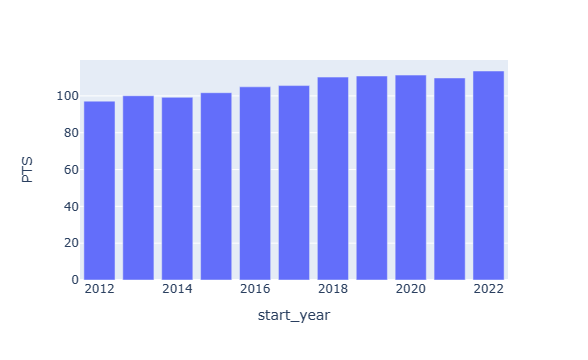

In [54]:
fig = px.bar(years_data_per48min,'start_year','PTS')
fig.show()

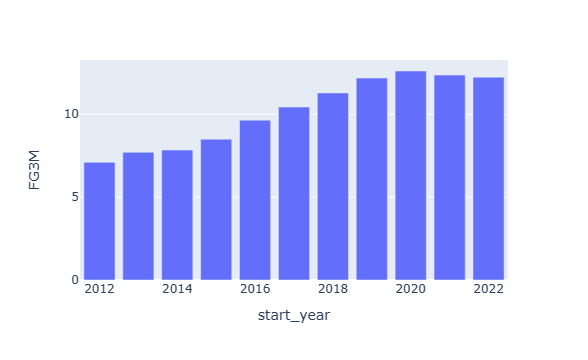

In [55]:
fig = px.bar(years_data_per48min,'start_year','FG3M')
fig.show()

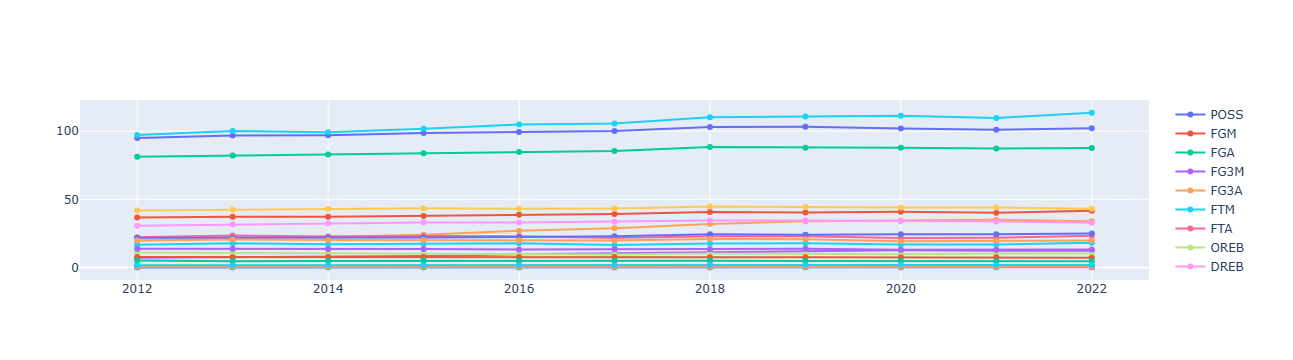

In [58]:
fig = go.Figure()
for col in years_data_per48min.columns[1:]:
    fig.add_trace(go.Scatter(x=years_data_per48min['start_year'],
                             y=years_data_per48min[col], name=col))
fig.show()

In [ ]:
## Regular season and Playoffs

In [105]:
years_data_regular = regular_data.groupby(['start_year'])[totals_col].sum().reset_index()
years_data_playoffs = playoffs_data.groupby(['start_year'])[totals_col].sum().reset_index()
for i in [years_data_regular,years_data_playoffs]:
    i['POSS'] = i['FGA']-i['OREB']+i['TOV']+0.5*i['FTA']
    i['POSS_48'] = (i['POSS']/i['MIN'])*48*5

    i['FG%'] = i['FGM']/i['FGA']
    i['3PT%'] = i['FG3M']/i['FG3A']
    i['FT%'] = i['FTM']/i['FTA']
    i['AST%'] = i['AST']/i['FGM']
    i['FG3A%'] = i['FG3A']/i['FGA']
    i['PTS/FGA'] = i['PTS']/i['FGA']
    i['FG3M/FGM'] = i['FG3M']/i['FGM']
    i['FTA/FGA'] = i['FTA']/i['FGA']
    i['TRU%'] = 0.5*i['PTS']/(i['FGA']+0.475*i['FTA'])
    i['AST_TOV'] = i['AST']/i['TOV']
    for col in totals_col[1:]:
       i[col] = (i[col]/i['MIN'])*48*5
    i.drop(columns=['MIN','POSS'],inplace = True)

In [106]:
years_data_regular

,start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,36.851465,81.391589,7.106509,19.808843,16.574722,22.015523,11.084264,30.729605,41.813869,21.967885,7.742352,5.095629,13.844834,19.690960,97.384160,95.159920,0.452767,0.358754,0.752865,0.596120,0.243377,1.196489,0.192842,0.270489,0.530132,1.586721
1,2013,37.410761,82.327143,7.683039,21.360412,17.689457,23.398712,10.824964,31.578523,42.403487,21.826943,7.618926,4.674984,13.937856,20.533399,100.194018,97.139391,0.454416,0.359686,0.756001,0.583440,0.259458,1.217023,0.205370,0.284216,0.536132,1.566019
2,2014,37.211625,82.889179,7.782075,22.232138,17.000003,22.659951,10.798536,32.145615,42.944151,21.855131,7.673610,4.756743,13.598470,20.051141,99.205328,97.019089,0.448932,0.350037,0.750222,0.587320,0.268215,1.196843,0.209130,0.273376,0.529645,1.607176
3,2015,37.950859,83.938110,8.453562,23.900992,17.545792,23.186073,10.338094,33.091665,43.429759,22.121762,7.787864,4.919309,13.691600,20.113774,101.901073,98.884653,0.452129,0.353691,0.756738,0.582905,0.284745,1.214002,0.222750,0.276228,0.536595,1.615718
4,2016,38.785819,84.836131,9.588549,26.818302,17.718305,22.955911,10.068219,33.152526,43.220745,22.473415,7.651297,4.711503,13.282571,19.764169,104.878493,99.528439,0.457185,0.357538,0.771841,0.579423,0.316119,1.236248,0.247218,0.270591,0.547724,1.691948
5,2017,39.376626,85.557627,10.429441,28.830391,16.530222,21.550352,9.654720,33.607234,43.261953,23.101412,7.671643,4.786947,13.594201,19.736607,105.712915,100.272284,0.460235,0.361752,0.767051,0.586678,0.336970,1.235576,0.264864,0.251881,0.551772,1.699358
6,2018,40.801191,88.600540,11.286114,31.790063,17.559587,22.914587,10.276400,34.580202,44.856602,24.418460,7.581540,4.919381,13.441195,20.761525,110.448084,103.222629,0.460507,0.355020,0.766306,0.598474,0.358802,1.246585,0.276612,0.258628,0.555099,1.816688
7,2019,40.564925,88.167665,12.121203,33.863627,17.728583,22.938985,10.001797,34.503386,44.505183,24.207254,7.592742,4.864041,13.812228,20.624136,110.979636,103.447589,0.460088,0.357942,0.772858,0.596753,0.384082,1.258734,0.298810,0.260175,0.560143,1.752596
8,2020,40.967034,87.890442,12.621915,34.433110,16.866342,21.691543,9.770974,34.263756,44.034730,24.656154,7.527037,4.843148,13.147003,19.176088,111.422326,102.112243,0.466115,0.366563,0.777554,0.601854,0.391773,1.267741,0.308099,0.246802,0.567359,1.875420
9,2021,40.392214,87.600133,12.367867,34.977887,16.837971,21.738553,10.275702,33.922911,44.198613,24.509379,7.587738,4.686354,12.981855,19.525531,109.990265,101.175563,0.461098,0.353591,0.774567,0.606785,0.399290,1.255595,0.306194,0.248157,0.561599,1.887972


In [107]:
years_data_playoffs

,start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,34.511812,78.241461,6.985845,20.302430,17.792164,23.682303,10.325136,30.401469,40.726605,19.009614,6.945263,4.765448,13.032514,21.873520,93.801633,92.789990,0.441094,0.344089,0.751285,0.550815,0.259484,1.198874,0.202419,0.302682,0.524087,1.458630
1,2013,35.979709,79.158694,7.927544,22.114846,18.618054,24.410831,10.134581,30.559403,40.693984,19.602048,7.010262,4.308448,12.563990,21.770170,98.505015,93.793519,0.454526,0.358472,0.762696,0.544808,0.279374,1.244399,0.220334,0.308378,0.542704,1.560177
2,2014,36.391742,83.565545,8.689108,25.255771,17.921285,24.712702,10.891895,33.609275,44.501170,21.509204,7.505339,5.296451,12.637039,21.625140,99.393878,97.667040,0.435487,0.344044,0.725185,0.591046,0.302227,1.189412,0.238766,0.295728,0.521457,1.702076
3,2015,36.329135,82.616129,9.079394,25.614179,17.494160,23.412238,10.414429,32.306692,42.721121,19.765454,7.276230,4.929805,12.379416,20.944446,99.231825,96.287235,0.439734,0.354468,0.747223,0.544066,0.310038,1.201119,0.249920,0.283386,0.529310,1.596639
4,2016,38.364195,83.328343,10.464108,28.978016,18.425656,23.733354,9.669845,31.921834,41.591679,22.075487,7.520290,4.664723,12.676700,20.688677,105.618155,98.201875,0.460398,0.361105,0.776361,0.575419,0.347757,1.267494,0.272757,0.284817,0.558226,1.741422
5,2017,38.184024,83.817998,10.452983,29.763397,17.096057,22.343782,9.142568,33.482305,42.624874,21.694641,7.267947,4.798787,12.479272,20.632963,103.917088,98.326593,0.455559,0.351203,0.765137,0.568160,0.355096,1.239794,0.273753,0.266575,0.550226,1.738454
6,2018,38.094855,86.057436,11.237741,32.596691,19.174169,24.461097,10.103103,34.443494,44.546598,22.777247,7.006991,4.822210,12.680179,21.956445,106.601619,100.865061,0.442668,0.344751,0.783864,0.597909,0.378778,1.238726,0.294994,0.284242,0.545687,1.796287
7,2019,38.495298,84.233468,12.957158,35.987461,18.647559,23.663233,8.729661,34.040902,42.770563,22.666070,6.974175,4.221526,13.225855,21.561427,108.595313,100.561278,0.457007,0.360046,0.788039,0.588801,0.427235,1.289218,0.336591,0.280924,0.568720,1.713770
8,2020,39.968785,86.451739,12.419646,34.127689,17.406233,22.135297,9.867824,33.343413,43.211237,21.854363,6.642930,4.377896,11.424670,20.385309,109.763449,99.076233,0.462325,0.363917,0.786356,0.546786,0.394760,1.269650,0.310734,0.256042,0.565989,1.912910
9,2021,38.105898,83.633233,12.254269,34.535801,17.695509,22.545559,9.355718,32.584302,41.940020,22.855503,7.082795,4.551586,12.943033,21.420577,106.161573,98.493328,0.455631,0.354828,0.784878,0.599789,0.412944,1.269371,0.321585,0.269577,0.562640,1.765854


In [108]:
percent_change = 100*(years_data_playoffs-years_data_regular)/years_data_regular
percent_change['start_year'] = list(range(2012,2023))
percent_change

,start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,-6.348873,-3.870336,-1.697938,2.491750,7.345174,7.570935,-6.848699,-1.067818,-2.600248,-13.466344,-10.295181,-6.479695,-5.867318,11.084074,-3.678758,-2.490471,-2.578327,-4.087829,-0.209871,-7.599984,6.618233,0.199291,4.966236,11.901914,-1.140337,-8.072676
1,2013,-3.825244,-3.848607,3.182403,3.531924,5.249438,4.325536,-6.377689,-3.227256,-4.031513,-10.193343,-7.988849,-7.840379,-9.857087,6.023216,-1.685733,-3.444403,0.024299,-0.337597,0.885596,-6.621383,7.675948,2.249447,7.286368,8.501325,1.225862,-0.373025
2,2014,-2.203297,0.815987,11.655414,13.600280,5.419305,9.058940,0.864546,4.553218,3.625682,-1.582820,-2.192849,11.346162,-7.070148,7.849920,0.190060,0.667859,-2.994847,-1.712025,-3.337309,0.634456,12.680819,-0.620861,14.170939,8.176235,-1.546026,5.904806
3,2015,-4.273221,-1.574947,7.403170,7.167846,-0.294267,0.975435,0.738386,-2.372116,-1.631687,-10.651541,-6.569634,0.213351,-9.583864,4.129866,-2.619450,-2.626715,-2.741450,0.219585,-1.257437,-6.663046,8.882691,-1.061217,12.197623,2.591192,-1.357688,-1.180848
4,2016,-1.087057,-1.777295,9.131299,8.053135,3.992204,3.386681,-3.956750,-3.712212,-3.769176,-1.770662,-1.712224,-0.992896,-4.561401,4.677697,0.705256,-1.332849,0.702727,0.997809,0.585688,-0.691117,10.008307,2.527472,10.330657,5.257416,1.917213,2.924120
5,2017,-3.028705,-2.033283,0.225724,3.236191,3.423034,3.681746,-5.304673,-0.371731,-1.472610,-6.089545,-5.262173,0.247342,-8.201502,4.541590,-1.698777,-1.940408,-1.016081,-2.916097,-0.249525,-3.156440,5.378842,0.341449,3.356075,5.833644,-0.280180,2.300645
6,2018,-6.632983,-2.870303,-0.428612,2.537357,9.194873,6.749021,-1.686356,-0.395336,-0.691101,-6.721199,-7.578260,-1.975276,-5.661818,5.755455,-3.482599,-2.283964,-3.873872,-2.892574,2.291217,-0.094483,5.567463,-0.630390,6.645142,9.903587,-1.695548,-1.122962
7,2019,-5.102012,-4.462177,6.896635,6.271724,5.183586,3.157283,-12.719070,-1.340404,-3.897569,-6.366621,-8.146811,-13.209507,-4.245321,4.544633,-2.148433,-2.790119,-0.669718,0.588031,1.964285,-1.332599,11.235238,2.421810,12.643731,7.975334,1.531171,-2.215349
8,2020,-2.436714,-1.636928,-1.602521,-0.886999,3.200995,2.045748,0.991207,-2.686054,-1.870098,-11.363455,-11.745744,-9.606405,-13.100581,6.305882,-1.488819,-2.973209,-0.813096,-0.721926,1.132088,-9.149693,0.762409,0.150573,0.855027,3.743961,-0.241332,1.999007
9,2021,-5.660289,-4.528418,-0.918494,-1.263899,5.092880,3.712324,-8.952998,-3.946033,-5.110099,-6.747932,-6.654718,-2.875756,-0.299041,9.705479,-3.480938,-2.651071,-1.185558,0.349826,1.331140,-1.152901,3.419362,1.097165,5.026298,8.631618,0.185316,-6.468233


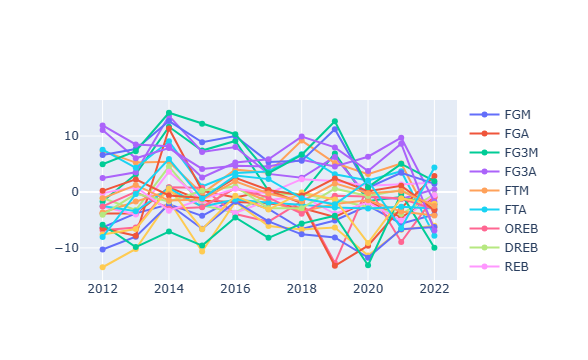

In [109]:
fig = go.Figure()
for col in percent_change.columns[1:]:
    fig.add_trace(go.Scatter(x=percent_change['start_year'],
                             y=percent_change[col], name=col))
fig.show()